In [6]:
# import files from ../src directory
import os
import sys
from pathlib import Path

current_dir = Path(os.getcwd())
src_path = str((current_dir / "../src/colour_som/").parent.resolve())

if src_path not in sys.path:
    sys.path.append(src_path)

In [7]:
# Generate Data
import numpy as np
input_data = np.random.random((10,3))
input_data

array([[0.27226225, 0.12044463, 0.00218997],
       [0.21897064, 0.77107607, 0.26171909],
       [0.46044533, 0.60860626, 0.73404525],
       [0.04526   , 0.28172708, 0.54065973],
       [0.0563596 , 0.66831259, 0.17349865],
       [0.55717168, 0.0822206 , 0.30641963],
       [0.66474069, 0.23165347, 0.55856297],
       [0.41920208, 0.97428603, 0.18431815],
       [0.28444712, 0.841274  , 0.77997957],
       [0.77609803, 0.4440735 , 0.63224087]])

In [8]:
from colour_som import SOMFast

2023-11-28 09:34:41,486 - INFO - Starting SOM training.
  0%|          | 0/2000 [00:00<?, ?it/s]2023-11-28 09:34:41,494 - INFO - iteration 0, learning rate: 0.1000, sigma: 50.0000, quantization error: 0.0157
2023-11-28 09:34:41,559 - INFO - iteration 100, learning rate: 0.0822, sigma: 41.1170, quantization error: 0.1479
  8%|▊         | 153/2000 [00:00<00:01, 1521.49it/s]2023-11-28 09:34:41,618 - INFO - iteration 200, learning rate: 0.0676, sigma: 33.8122, quantization error: 0.0532
2023-11-28 09:34:41,679 - INFO - iteration 300, learning rate: 0.0556, sigma: 27.8051, quantization error: 0.0017
 24%|██▍       | 486/2000 [00:00<00:00, 1628.42it/s]2023-11-28 09:34:41,803 - INFO - iteration 500, learning rate: 0.0376, sigma: 18.8030, quantization error: 0.0023
2023-11-28 09:34:41,860 - INFO - iteration 600, learning rate: 0.0309, sigma: 15.4625, quantization error: 0.0025
 33%|███▎      | 654/2000 [00:00<00:00, 1646.21it/s]2023-11-28 09:34:41,919 - INFO - iteration 700, learning rate: 0.0

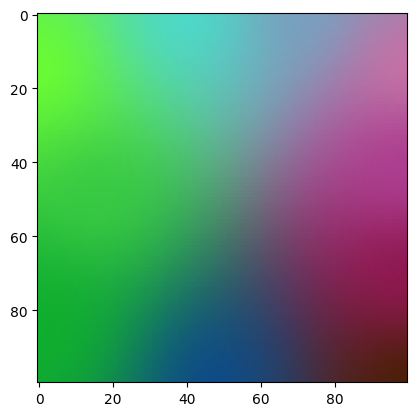

In [11]:
som = SOMFast((100, 100), 3)
som.train(input_data, n_iterations=2000)
som.visualise()

In [22]:
new_colours = np.random.random((10,3))
bmus = som.predict(new_colours)

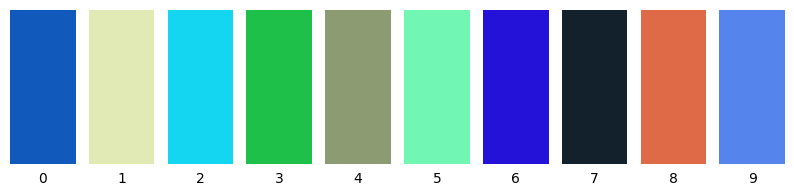

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, axs = plt.subplots(1, len(new_colours), figsize=(10, 2))
for ax in axs:
    ax.axis('off')

for i, (ax, color) in enumerate(zip(axs, new_colours)):
    rect = patches.Rectangle((0, 0), 1, 1, color=color)
    ax.add_patch(rect)
    ax.text(0.5, -0.1, str(i), ha='center', va='center', fontsize=10)

plt.show()

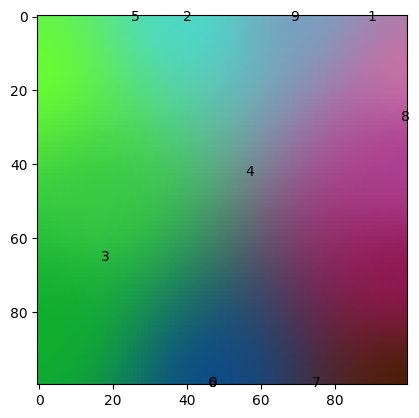

In [24]:
# make rgb image
som_grid = som.weights.reshape(som.grid_width, som.grid_height, 3)

plt.imshow(som_grid, interpolation='none')

for i, bmu in enumerate(bmus):
    plt.text(bmu[1], bmu[0], str(i), ha='center', va='center', color='black')